## Métodos de Otimização: Métodos Heuristicos

### Recozimento Simulado

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
from scipy.stats import qmc

In [2]:
def f(x,nFunc,nVar):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
# Método Baseado no algoritmo de Metropolis-Hasting
T = 1000 #Temperatura inicial

nFunc = 5; Qvar = 2

nvar=2
Ns=20
Nit=5
RT=0.8
niter_max = 50
#chute incial:
x1 = 3
x2 = 2

xnew=np.zeros(nvar, dtype='float')
xold=np.zeros(nvar, dtype='float')
xbest=np.zeros(nvar, dtype='float')
N=np.zeros(nvar, dtype='float')
Vu=np.zeros(nvar, dtype='float')
V=3*np.ones(nvar, dtype='float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
layout = "{0:.5f}"
fHist = []

xold[0]=x1; xold[1]=x2; Fold = f(xold,nFunc,Qvar)
xbest = xold.copy(); fbest = f(xold,nFunc,Qvar)
xmin[0] = -5; xmin[1] = 0
xmax[0] = 10; xmax[1] = 15
fHist.append(fbest)
c = 2
niter = 0
flag = 1
#print("Valor de N: "+layout.format(N[0])+" "+layout.format(N[1]))
#print("Valor de V: "+layout.format(V[0])+" "+layout.format(V[1]))
while niter<niter_max:
    for k in range(0,Nit):
        N=np.zeros(nvar, dtype='float')
        for j in range(0,Ns):
            for i in range(0,nvar):
                xnew = xold.copy()
                flag = 1
                R = random.uniform(-1,1)
                xnew[i] = xold[i] + R*V[i]
                if (xnew[i]>xmax[i]) or (xnew[i]<xmin[i]):
                    xnew = xold.copy()
                    flag = 0
                #xnew[i] = max(min(xnew[i],xmax[i]),xmin[i])
                if (f(xnew,nFunc,Qvar) < f(xold,nFunc,Qvar)) and flag == 1:
                    xold = xnew.copy()
                    N[i] = N[i] + 1
                    if f(xnew,nFunc,Qvar) < fbest:
                        fbest = f(xnew,nFunc,Qvar)
                        xbest = xnew.copy()
                elif flag == 1:
                    P = np.exp((f(xold,nFunc,Qvar)-f(xnew,nFunc,Qvar))/T)
                    R = random.uniform(0,1)
                    if P > R:
                        xold = xnew.copy()
                        N[i] = N[i] + 1
        for i in range(0,nvar):
            if N[i]>0.6*Ns:
                Vu[i] = V[i]*(1 + c*(N[i]/Ns-0.6)/0.4)
            elif N[i]<0.4*Ns:
                Vu[i] = V[i]/(1+c*(0.4-N[i]/Ns)/0.4)
            else:
                Vu[i] = V[i]
        V = Vu.copy()
    T = T*RT
    print("Coordenadas: " + layout.format(xbest[0])+" "+layout.format(xbest[1])+" "+"Resultado: "+layout.format(fbest))
    #print("Valor de N: "+layout.format(N[0])+" "+layout.format(N[1]))
    #print("Valor de V: "+layout.format(V[0])+" "+layout.format(V[1]))
    fHist.append(fbest)
    niter += 1

Valor de N: 0.00000 0.00000
Valor de V: 3.00000 3.00000
Coordenadas: 3.00000 2.00000 Resultado: 0.64453
Coordenadas: 3.00000 2.00000 Resultado: 0.64453
Coordenadas: 3.00000 2.00000 Resultado: 0.64453
Coordenadas: -3.10624 11.77397 Resultado: 0.57713
Coordenadas: -3.10624 11.77397 Resultado: 0.57713
Coordenadas: -3.10624 11.77397 Resultado: 0.57713
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.04544 Resultado: 0.47089
Coordenadas: 3.24384 2.045

In [4]:
print(T)

0.014272476927059633


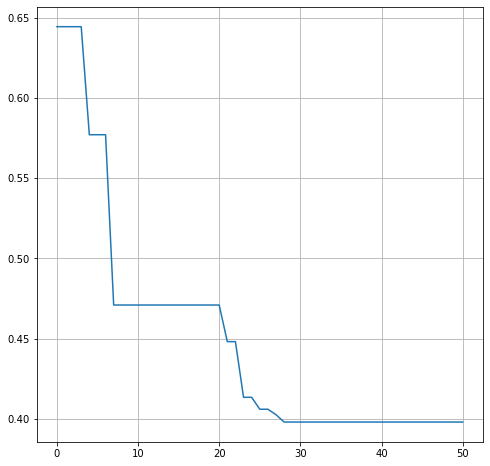

In [5]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(0,niter_max+1),fHist)
plt.grid()
plt.show()